In [1]:
#importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
bank = pd.read_csv('/kaggle/input/bank-debt-data/bank_data.csv')
bank.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [3]:
#Defing variables 
ages = bank['age']
recovery_amounts = bank['expected_recovery_amount']

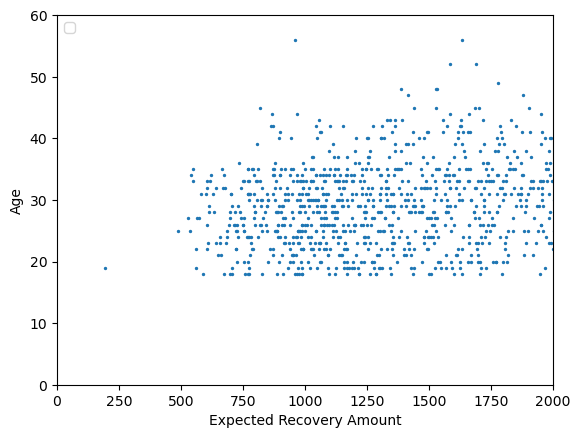

In [4]:
plt.scatter(x = bank['expected_recovery_amount'], y = bank['age'], s = 2)
plt.xlim(0, 2000) #limit exp recov amount to $2000
plt.ylim(0, 60) #to avoid non-data whitespace
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.legend(loc = 2)
plt.show()

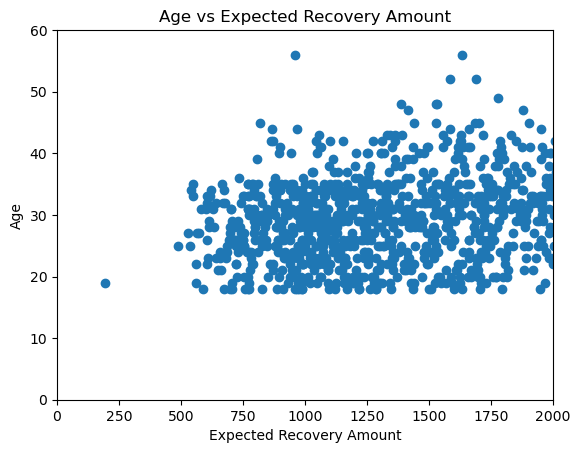

In [5]:
plt.scatter(recovery_amounts, ages)
plt.xlabel('Expected Recovery Amount')
plt.xlim(0, 2000) #limit exp recov amount to $2000
plt.ylim(0, 60) #to avoid non-data whitespace
plt.ylabel('Age')
plt.title('Age vs Expected Recovery Amount')
plt.show()

In [6]:
# Define the threshold value
threshold = 1000

# Extract data for the range from $900 to $1100
range_data = bank[(bank['expected_recovery_amount'] >= 900) & (bank['expected_recovery_amount'] <= 1100)]

# Divide the data into two groups based on the threshold
above_threshold = range_data[range_data['expected_recovery_amount'] > threshold]
below_threshold = range_data[range_data['expected_recovery_amount'] <= threshold]

# Calculate the average age for each group
average_age_above = above_threshold['age'].mean()
average_age_below = below_threshold['age'].mean()

# Perform an independent samples t-test to compare the average ages of the two groups
t_statistic, p_value = stats.ttest_ind(above_threshold['age'], below_threshold['age'])

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level to determine if there's a significant difference
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in average age between the two groups."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in average age between the two groups."

# Print the results
print(f'Average age just above the threshold: {average_age_above:.2f}')
print(f'Average age just below the threshold: {average_age_below:.2f}')
print(f'T-Statistic: {t_statistic:.2f}')
print(f'P-Value: {p_value:.4f}')
print(conclusion)

Average age just above the threshold: 28.68
Average age just below the threshold: 27.22
T-Statistic: 1.61
P-Value: 0.1083
Fail to reject the null hypothesis. There is no significant difference in average age between the two groups.


In [7]:
# Define the threshold value
threshold = 1000

# Extract data for the range from $900 to $1100
range_data = bank[(bank['expected_recovery_amount'] >= 900) & (bank['expected_recovery_amount'] <= 1100)]

# Divide the data into two groups based on the threshold
above_threshold = range_data[range_data['expected_recovery_amount'] > threshold]
below_threshold = range_data[range_data['expected_recovery_amount'] <= threshold]

# Calculate the percentage of male customers for each group
percent_male_above = (above_threshold['sex'] == 'Male').mean() * 100
percent_male_below = (below_threshold['sex'] == 'Male').mean() * 100

# Perform a chi-square test to compare the proportions of male customers between the two groups
observed_values = [[len(above_threshold[above_threshold['sex'] == 'Male']),
                    len(above_threshold[above_threshold['sex'] == 'Female'])],
                   [len(below_threshold[below_threshold['sex'] == 'Male']),
                    len(below_threshold[below_threshold['sex'] == 'Female'])]]

chi2, p_value, dof, expected = stats.chi2_contingency(observed_values)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level to determine if there's a significant difference
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in the proportion of male customers between the two groups."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the proportion of male customers between the two groups."

# Print the results
print(f'Percentage of male customers just above the threshold: {percent_male_above:.2f}%')
print(f'Percentage of male customers just below the threshold: {percent_male_below:.2f}%')
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-Value: {p_value:.4f}')
print(conclusion)

Percentage of male customers just above the threshold: 57.89%
Percentage of male customers just below the threshold: 64.04%
Chi-Square Statistic: 0.49
P-Value: 0.4820
Fail to reject the null hypothesis. There is no significant difference in the proportion of male customers between the two groups.


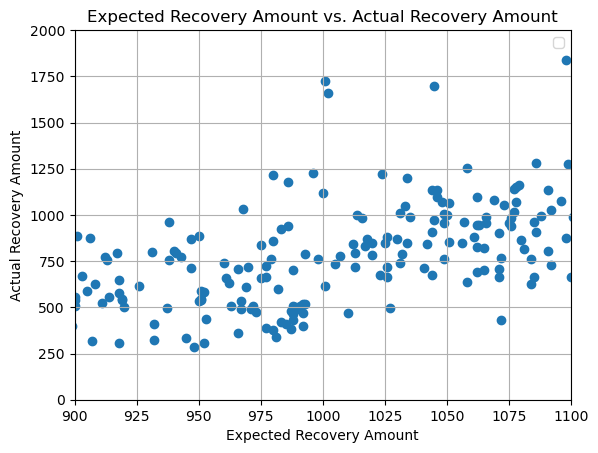

In [8]:
# Define the threshold value
threshold = 1000

# Extract data for the range from $900 to $1100
#range_data = bank[(bank['expected_recovery_amount'] >= 900) & (bank['expected_recovery_amount'] <= 1100)]

# Create scatter plot
plt.scatter(bank['expected_recovery_amount'], bank['actual_recovery_amount'])
plt.xlim(900, 1100) #just below, just above threshold
plt.ylim(0, 2000)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Expected Recovery Amount vs. Actual Recovery Amount')
#plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold ($1000)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:


# Define the threshold value
threshold = 1000

# Extract data for the two windows: $900 to $1100 and $950 to $1050
window_1 = bank[(bank['expected_recovery_amount'] >= 900) & (bank['expected_recovery_amount'] <= 1100)]
window_2 = bank[(bank['expected_recovery_amount'] >= 950) & (bank['expected_recovery_amount'] <= 1050)]

# Divide the data into two groups based on the threshold for each window
above_threshold_1 = window_1[window_1['actual_recovery_amount'] > threshold]
below_threshold_1 = window_1[window_1['actual_recovery_amount'] <= threshold]

above_threshold_2 = window_2[window_2['actual_recovery_amount'] > threshold]
below_threshold_2 = window_2[window_2['actual_recovery_amount'] <= threshold]

# Perform the Kruskal-Wallis test for each window
kw_statistic_1, p_value_1 = stats.kruskal(above_threshold_1['actual_recovery_amount'], below_threshold_1['actual_recovery_amount'])
kw_statistic_2, p_value_2 = stats.kruskal(above_threshold_2['actual_recovery_amount'], below_threshold_2['actual_recovery_amount'])

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-values are less than the significance level to determine if there's a significant difference
if p_value_1 < alpha:
    conclusion_1 = "Reject the null hypothesis for Window 1. There is a significant difference in the actual recovery amount above the threshold."
else:
    conclusion_1 = "Fail to reject the null hypothesis for Window 1. There is no significant difference in the actual recovery amount above the threshold."

if p_value_2 < alpha:
    conclusion_2 = "Reject the null hypothesis for Window 2. There is a significant difference in the actual recovery amount above the threshold."
else:
    conclusion_2 = "Fail to reject the null hypothesis for Window 2. There is no significant difference in the actual recovery amount above the threshold."

# Print the results for each window
print("Results for Window 1 (Expected Recovery Amount $900 to $1100):")
print(f'Kruskal-Wallis Statistic: {kw_statistic_1:.2f}')
print(f'P-Value: {p_value_1:.4f}')
print(conclusion_1)

print("\nResults for Window 2 (Expected Recovery Amount $950 to $1050):")
print(f'Kruskal-Wallis Statistic: {kw_statistic_2:.2f}')
print(f'P-Value: {p_value_2:.4f}')
print(conclusion_2)

Results for Window 1 (Expected Recovery Amount $900 to $1100):
Kruskal-Wallis Statistic: 86.40
P-Value: 0.0000
Reject the null hypothesis for Window 1. There is a significant difference in the actual recovery amount above the threshold.

Results for Window 2 (Expected Recovery Amount $950 to $1050):
Kruskal-Wallis Statistic: 45.71
P-Value: 0.0000
Reject the null hypothesis for Window 2. There is a significant difference in the actual recovery amount above the threshold.


In [10]:
# Define the dependent (outcome) variable and independent (input) variable
y = bank['actual_recovery_amount']
x = bank['expected_recovery_amount']

# Add constant term to the independent variable for the intercept in the regression
x = sm.add_constant(x)

# Create and fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                            15:12:42   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [11]:
# Define the dependent (outcome) variable and independent (input) variable
y = bank['actual_recovery_amount']
x = bank['expected_recovery_amount']

# Add constant term to the independent variable for the intercept in the regression
x = sm.add_constant(x)

# Create an indicator variable for the true threshold
bank['Above_Threshold'] = (bank['expected_recovery_amount'] > 1000).astype(int)

# Add the threshold indicator to the independent variables
x['Above_Threshold'] = bank['Above_Threshold']

# Create and fit the linear regression model with the threshold indicator
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                            15:12:42   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [12]:
# Define the dependent (outcome) variable and independent (input) variable
y = bank['actual_recovery_amount']
x = bank['expected_recovery_amount']

# Add constant term to the independent variable for the intercept in the regression
x = sm.add_constant(x)

# Create an indicator variable for the true threshold
bank['Above_Threshold'] = (bank['expected_recovery_amount'] > 1000).astype(int)

# Add the threshold indicator to the independent variables
x['Above_Threshold'] = bank['Above_Threshold']

# Filter the data for the new window: $950 to $1050
data_window_2 = bank[(bank['expected_recovery_amount'] >= 950) & (bank['expected_recovery_amount'] <= 1050)]
x_window_2 = x.loc[data_window_2.index]
y_window_2 = y.loc[data_window_2.index]

# Create and fit the linear regression model with the threshold indicator for the new window
model_window_2 = sm.OLS(y_window_2, x_window_2).fit()

# Print the summary of the model for the new window
print(model_window_2.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Sat, 22 Jul 2023   Prob (F-statistic):           2.42e-07
Time:                            15:12:42   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------